In [45]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from plot_helpers import get_random_trials2plot

from lfads_torch.metrics import r2_score, r2_UIVE

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [46]:
dataset_name = 'chewie_10_07_M1'
bin_width_sec = 0.01 # chewie
PATH = 'f"/disk/scratch2/nkudryas/BAND-torch/datasets'

dest = f"/disk/scratch2/nkudryas/BAND-torch/runs/band-paper/{dataset_name}/"

<IPython.core.display.Javascript object>

In [47]:
path = '../../results/Chewie_CO_FF_2016-10-07.h5'
data = {}
with h5py.File(path, 'r') as f:
   for key in f.keys():
      data[key] = f[key][()]
data.keys()

dict_keys(['test_M1_band_10f_2c_pred', 'test_M1_band_10f_2c_sample1_pred', 'test_M1_band_10f_2c_sample2_pred', 'test_M1_band_10f_2c_sample3_pred', 'test_M1_band_10f_2c_sample4_pred', 'test_M1_band_12f_2c_pred', 'test_M1_band_12f_2c_sample1_pred', 'test_M1_band_12f_2c_sample2_pred', 'test_M1_band_12f_2c_sample3_pred', 'test_M1_band_12f_2c_sample4_pred', 'test_M1_band_14f_2c_pred', 'test_M1_band_14f_2c_sample1_pred', 'test_M1_band_14f_2c_sample2_pred', 'test_M1_band_14f_2c_sample3_pred', 'test_M1_band_14f_2c_sample4_pred', 'test_M1_band_16f_2c_pred', 'test_M1_band_16f_2c_sample1_pred', 'test_M1_band_16f_2c_sample2_pred', 'test_M1_band_16f_2c_sample3_pred', 'test_M1_band_16f_2c_sample4_pred', 'test_M1_band_32f_2c_pred', 'test_M1_band_32f_2c_sample1_pred', 'test_M1_band_32f_2c_sample2_pred', 'test_M1_band_4f_2c_pred', 'test_M1_band_4f_2c_sample1_pred', 'test_M1_band_4f_2c_sample2_pred', 'test_M1_band_64f_2c_pred', 'test_M1_band_64f_2c_sample1_pred', 'test_M1_band_64f_2c_sample2_pred', 'tes

<IPython.core.display.Javascript object>

In [48]:
for key in data.keys():
    if ('lfads' not in key) & ('band' not in key) & ('all' in key):
        print(key)

test_all_avg_per_epoch_pred
test_all_birnn_pred
test_all_cebra_pred
test_all_psid_100f_pred
test_all_psid_10f_pred
test_all_psid_12f_pred
test_all_psid_14f_pred
test_all_psid_16f_pred
test_all_psid_32f_pred
test_all_psid_4f_pred
test_all_psid_64f_pred
test_all_psid_8f_pred
test_all_psid_pred
train_all_avg_per_epoch_pred
train_all_birnn_pred
train_all_cebra_pred
train_all_psid_100f_pred
train_all_psid_10f_pred
train_all_psid_12f_pred
train_all_psid_14f_pred
train_all_psid_16f_pred
train_all_psid_32f_pred
train_all_psid_4f_pred
train_all_psid_64f_pred
train_all_psid_8f_pred
train_all_psid_pred


<IPython.core.display.Javascript object>

In [49]:
dset='valid'
vel = data[f'{dset}_behavior'][:]
target_direction = data[f'{dset}_target_direction'][:]
epoch = data[f'{dset}_epoch'][:]
pos = np.cumsum(vel, axis=1)

<IPython.core.display.Javascript object>

In [50]:
dir_index = np.array([
        sorted(set(target_direction)).index(i) for i in target_direction
    ])

avg_vel_per_epoch = data['test_all_avg_per_epoch_pred']
np.random.seed(1)
# trials2plot = np.array([get_random_trials2plot(vel, avg_vel_per_epoch, dir_index, epoch, i) for i in range(3)]).sum(0)
trials2plot = np.array([get_random_trials2plot(dir_index, epoch, i) for i in range(3)]).sum(0)
trials2plot.sum()

24

<IPython.core.display.Javascript object>

In [51]:
key = 'test_all_band_16f_2c_sample1_pred'
if "sample" in key:
    print(key)

test_all_band_16f_2c_sample1_pred


<IPython.core.display.Javascript object>

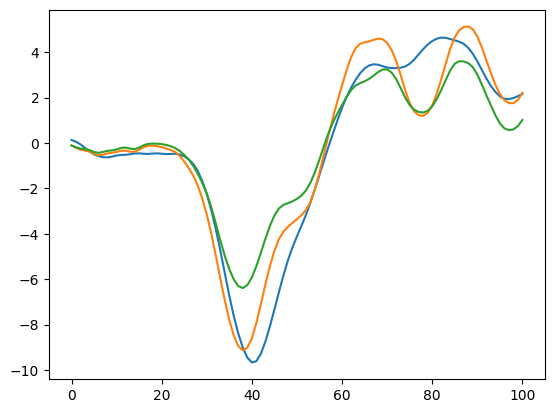

<IPython.core.display.Javascript object>

In [52]:
epoch_mask, epoch_name = (epoch==1), 'AD'
key = f'test_all_avg_per_epoch_pred'
# data[key][epoch_mask],vel[epoch_mask],dir_index[epoch_mask])
plt.plot(data[key][epoch_mask][dir_index[epoch_mask] == 1][0,:,0])
plt.plot(np.mean(vel[epoch_mask][dir_index[epoch_mask] == 1],axis=0)[:,0])
plt.plot(np.mean(vel[dir_index == 1],axis=0)[:,0])

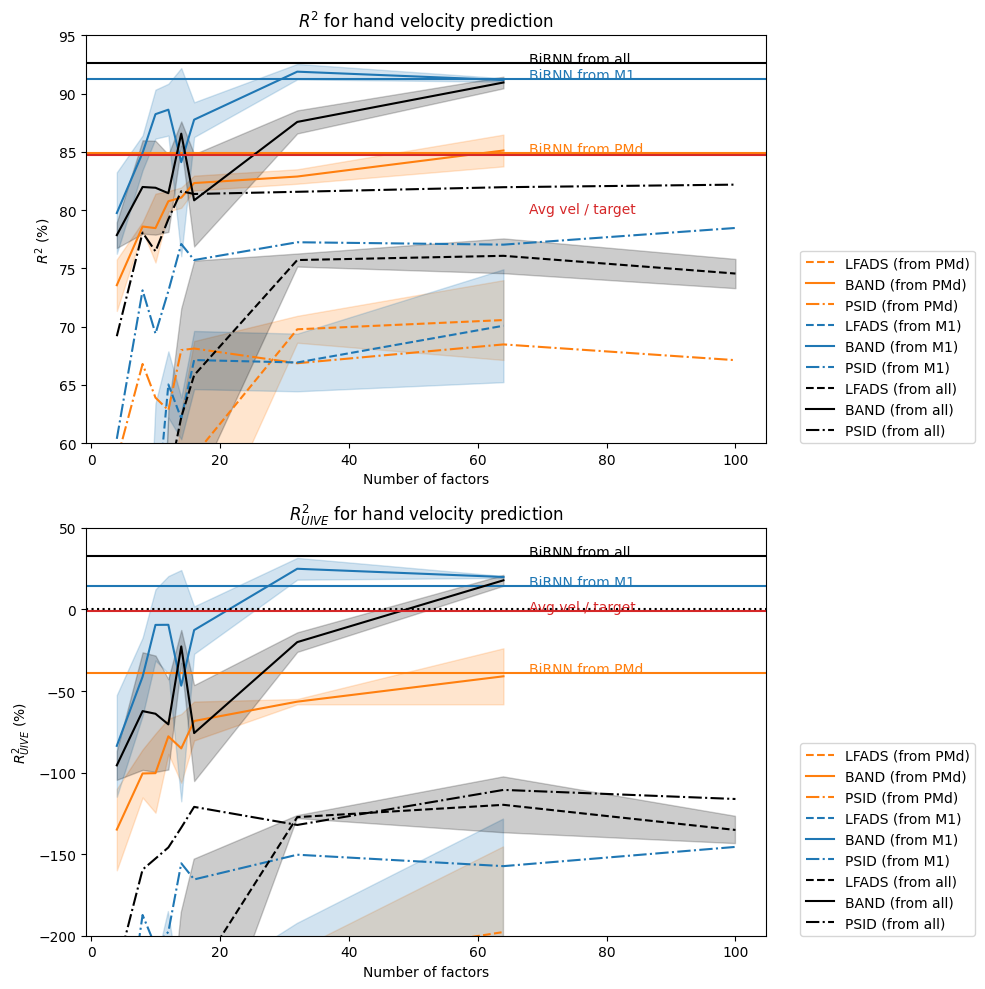

<IPython.core.display.Javascript object>

In [54]:
co_dim=2

epoch_mask, epoch_name = (epoch==1), 'AD'

nfactors = [4,8,10,12,14,16,32,64,100]

r2, r2_uive = {}, {}

fig,ax = plt.subplots(2,1,figsize=(10,10))

ax[0].set_title(r'$R^2$ for hand velocity prediction')
ax[1].set_title(r'$R_{UIVE}^2$ for hand velocity prediction')
for area, color in zip(['PMd','M1','all'],['C1','C0','k']):
# for area, color in zip(['all'],['k']):

    r2[f'lfads_{area}'] = []
    r2[f'band_{area}'] = []
    r2[f'psid_{area}'] = []
    for i, fac_dim in enumerate(nfactors):

        key = f'test_{area}_lfads_{fac_dim}f_{co_dim}c_pred'
        r2_lfads = []
        while key in data:

            r2_lfads.append(100*r2_score(data[key][epoch_mask],vel[epoch_mask]))

            if "sample" in key:
                split = key.replace('_pred','').split('_sample')
                key = split[0] + '_sample' + str(int(split[1])+1) + '_pred'
            else:
                key = key.replace('_pred','')
                key += '_sample1_pred'

        key = f'test_{area}_band_{fac_dim}f_{co_dim}c_pred'
        r2_band = []
        while key in data:

            r2_band.append(100*r2_score(data[key][epoch_mask],vel[epoch_mask]))

            if "sample" in key:
                split = key.replace('_pred','').split('_sample')
                key = split[0] + '_sample' + str(int(split[1])+1) + '_pred'
            else:
                key = key.replace('_pred','')
                key += '_sample1_pred'

        r2[f'lfads_{area}'].append((np.mean(r2_lfads),np.std(r2_lfads)))
        r2[f'band_{area}'].append((np.mean(r2_band),np.std(r2_band)))

        key = f'test_{area}_psid_{fac_dim}f_pred'
        r2[f'psid_{area}'].append(100*r2_score(data[key][epoch_mask],vel[epoch_mask]))

    r2[f'lfads_{area}'] = np.array(r2[f'lfads_{area}'])
    r2[f'band_{area}'] = np.array(r2[f'band_{area}'])
    ax[0].plot(nfactors, r2[f'lfads_{area}'][:,0], label = f'LFADS (from {area})', c=color,linestyle='--')
    ax[0].plot(nfactors, r2[f'band_{area}'][:,0], label = f'BAND (from {area})', c=color)
    ax[0].plot(nfactors, r2[f'psid_{area}'], label = f'PSID (from {area})', c=color,linestyle='-.')
    ax[0].fill_between(nfactors, 
                       r2[f'lfads_{area}'][:,0]-r2[f'lfads_{area}'][:,1], 
                       r2[f'lfads_{area}'][:,0]+r2[f'lfads_{area}'][:,1], color=color, alpha=0.2)
    ax[0].fill_between(nfactors,
                          r2[f'band_{area}'][:,0]-r2[f'band_{area}'][:,1], 
                          r2[f'band_{area}'][:,0]+r2[f'band_{area}'][:,1], color=color, alpha=0.2)

    ##############################################################################################

    r2_uive[f'lfads_{area}'] = []
    r2_uive[f'band_{area}'] = []
    r2_uive[f'psid_{area}'] = []
    for i, fac_dim in enumerate(nfactors):


        key = f'test_{area}_lfads_{fac_dim}f_{co_dim}c_pred'
        r2_uive_lfads = []
        while key in data:

            r2_uive_lfads.append(100*r2_UIVE(data[key][epoch_mask],vel[epoch_mask],dir_index[epoch_mask]))

            if "sample" in key:
                split = key.replace('_pred','').split('_sample')
                key = split[0] + '_sample' + str(int(split[1])+1) + '_pred'
            else:
                key = key.replace('_pred','')
                key += '_sample1_pred'

        key = f'test_{area}_band_{fac_dim}f_{co_dim}c_pred'
        r2_uive_band = []
        while key in data:

            r2_uive_band.append(100*r2_UIVE(data[key][epoch_mask],vel[epoch_mask],dir_index[epoch_mask]))

            if "sample" in key:
                split = key.replace('_pred','').split('_sample')
                key = split[0] + '_sample' + str(int(split[1])+1) + '_pred'
            else:
                key = key.replace('_pred','')
                key += '_sample1_pred'

        r2_uive[f'lfads_{area}'].append((np.mean(r2_uive_lfads),np.std(r2_uive_lfads)))
        r2_uive[f'band_{area}'].append((np.mean(r2_uive_band),np.std(r2_uive_band)))

        key = f'test_{area}_psid_{fac_dim}f_pred'
        r2_uive[f'psid_{area}'].append(100*r2_UIVE(data[key][epoch_mask],vel[epoch_mask],dir_index[epoch_mask]))

    r2_uive[f'lfads_{area}'] = np.array(r2_uive[f'lfads_{area}'])
    r2_uive[f'band_{area}'] = np.array(r2_uive[f'band_{area}'])
    ax[1].plot(nfactors, r2_uive[f'lfads_{area}'][:,0], label = f'LFADS (from {area})', c=color,linestyle='--')
    ax[1].plot(nfactors, r2_uive[f'band_{area}'][:,0], label = f'BAND (from {area})', c=color)
    ax[1].plot(nfactors, r2_uive[f'psid_{area}'], label = f'PSID (from {area})', c=color,linestyle='-.')
    ax[1].fill_between(nfactors, 
                       r2_uive[f'lfads_{area}'][:,0]-r2_uive[f'lfads_{area}'][:,1], 
                       r2_uive[f'lfads_{area}'][:,0]+r2_uive[f'lfads_{area}'][:,1], color=color, alpha=0.2)
    ax[1].fill_between(nfactors,
                          r2_uive[f'band_{area}'][:,0]-r2_uive[f'band_{area}'][:,1], 
                          r2_uive[f'band_{area}'][:,0]+r2_uive[f'band_{area}'][:,1], color=color, alpha=0.2)

    # add baselines
    key = f'test_{area}_birnn_pred'
    r2_high = 100*r2_score(data[key][epoch_mask],vel[epoch_mask])
    r2_uive_high = 100*r2_UIVE(data[key][epoch_mask],vel[epoch_mask],dir_index[epoch_mask])

    ax[0].axhline(r2_high,c=color)
    ax[1].axhline(r2_uive_high,c=color)
    # if area == 'M1':
        # ax[0].text(70,r2_high-5,f'BiRNN from {area}',color=color)
    # else:
    ax[0].text(68,r2_high,f'BiRNN from {area}',color=color)
    ax[1].text(68,r2_uive_high,f'BiRNN from {area}',color=color)

# avg per condition baseline (computed on train and test together, as there is no training)
keys = [f'{dset}_all_avg_per_epoch_pred' for dset in ['train','test']] 
epochs = np.concatenate([data[f'{dset}_epoch'][:] for dset in ['train','valid']])
avg_pred = np.concatenate([data[key] for key in keys])[epochs==1]
true_vel = np.concatenate([data[f'{dset}_behavior'][:] for dset in ['train','valid']])[epochs==1]
dirs = np.concatenate([data[f'{dset}_target_direction'][:] for dset in ['train','valid']])[epochs==1]
dir_idxs = np.array([
        sorted(set(dirs)).index(i) for i in dirs
    ])
r2_low = 100*r2_score(avg_pred,true_vel)
r2_uive_low = 100*r2_UIVE(avg_pred,true_vel,dir_idxs)

c = 'C3'
ax[0].axhline(r2_low,c=c)
ax[1].axhline(r2_uive_low,c=c)
ax[0].text(68,r2_low-5,'Avg vel / target',color=c)
ax[1].text(68,r2_uive_low,'Avg vel / target',color=c)

ax[0].set_ylim([60,95])
ax[1].set_ylim([-200,50])

# test_all_birnn_pred
ax[1].axhline(0,c='k',linestyle=":")

for a in ax:
    a.set_xlabel('Number of factors')
    a.legend(loc = (1.05,0))
ax[0].set_ylabel(r'$R^2$ (%)')
ax[1].set_ylabel(r'$R_{UIVE}^2$ (%)')

plt.tight_layout()

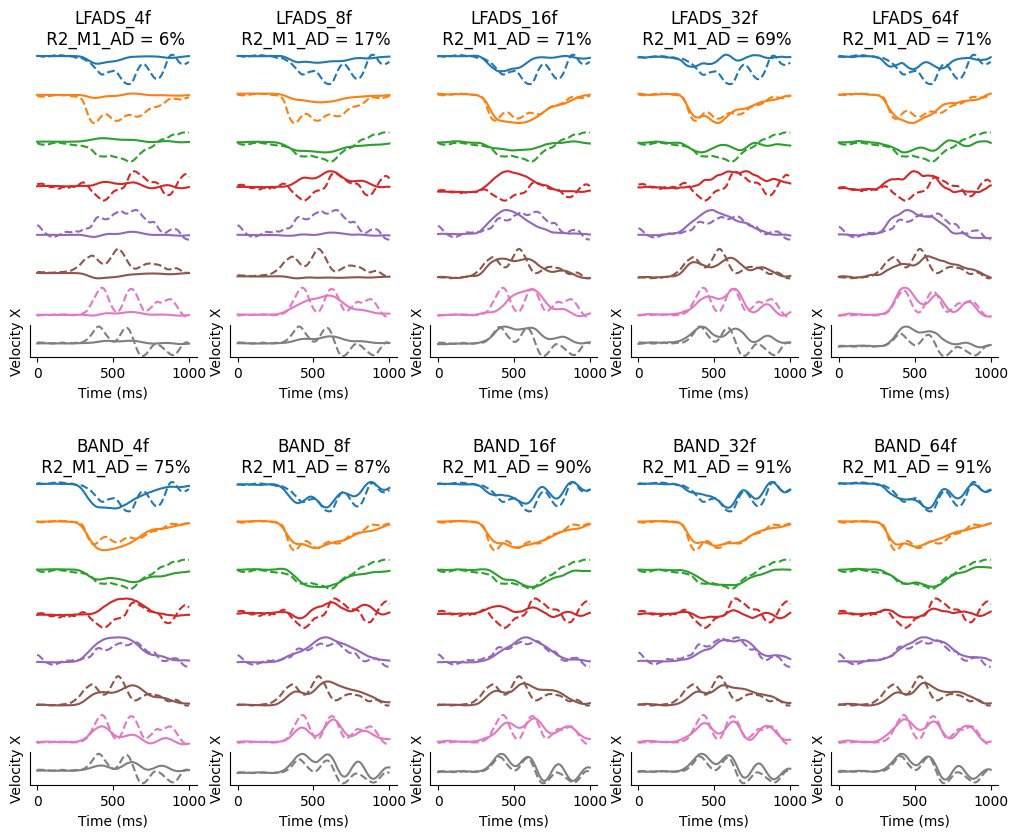

<IPython.core.display.Javascript object>

In [10]:
def plot_beh_pred(vel, pred_vel, dir_index, t2p, axes, area, epoch_name, component=0,title=""):
    '''
    Plot hand velocity and predicted hand velocity for each direction
    '''

    BIN_SIZE = 10 # ms
    time = np.arange(vel.shape[1]) * BIN_SIZE

    for v, ls in zip([vel, pred_vel], ["--", "solid"]):
        for t in range(0, vel.shape[0]):
            if t2p[t]:
                d = dir_index[t]
                axes[d].plot(
                    time,
                    v[t, :, component],
                    color=f"C{d}",
                    alpha=1,
                    ls=ls,
                )

    for ax in axes[:-1]:
        ax.axis("off")
    axes[-1].spines['top'].set_visible(False)
    axes[-1].spines['right'].set_visible(False)
    axes[-1].set_yticks([])
    axes[-1].set_xlabel("Time (ms)")
    axes[-1].set_ylabel("Velocity X")

    R2_iso_vel = r2_score(pred_vel,vel)
    
    axes[0].set_title(f'{title}\n R2_{area}_{epoch_name} = {R2_iso_vel*100:.0f}%')
        

fig, axes = plt.subplots(8*2+3,5,figsize=(5*2.5, (8*2+3)*.5))

component = 0

area = 'M1'
for i, fac_dim in enumerate([4,8,16,32,64]):
    key = f'test_{area}_lfads_{fac_dim}f_{co_dim}c_pred'
    title= f'LFADS_{fac_dim}f' 

    plot_beh_pred(vel[epoch_mask], 
                data[key][epoch_mask], 
                dir_index[epoch_mask], 
                trials2plot[epoch_mask], 
                axes[:8,i], 
                area,
                epoch_name,
                component=1, 
                title=title)
    
    axes[8,i].axis('off')
    axes[9,i].axis('off')
    axes[10,i].axis('off')

    key = f'test_{area}_band_{fac_dim}f_{co_dim}c_pred'
    title= f'BAND_{fac_dim}f' 

    plot_beh_pred(vel[epoch_mask], 
                data[key][epoch_mask], 
                dir_index[epoch_mask], 
                trials2plot[epoch_mask], 
                axes[8+3:,i], 
                area,
                epoch_name,
                component=1, 
                title=title)
    
   

fig.savefig("figs/Figure5")